In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", context="notebook")


# Data Import
• ID - Уникальный Идентификатор  
• Customer_ID - Идентификатор клиента  
• Month - Месяц  
• Name - Имя клиента  
• Age - Возраст клиента  
• SSN - Номер социального страхования  
• Occupation - Профессия  
• Annual_Income - Годовой доход  
• Monthly_Inhand_Salary - Ежемесячный доход  
• Num_Bank_Accounts - Число банковских аккаунтов  
• Num_Credit_Card - Номер кредитной карты  
• Interest_Rate - Процентная ставка  
• Num_of_Loan - Номер кредита  
• Type_of_Loan - Тип кредита  
• Delay_from_due_date - Срок отсрочки платежа  
• Num_of_Delayed_Payment - Номер_сроченного платежа  
• Changed_Credit_Limit - Изменен ли лимит кредита  
• Num_Credit_Inquiries - Число кредитных запросов  
• Credit_Mix - Сумма кредита  
• Outstanding_Debt - Превышение долга  
• Credit_Utilization_Ratio - Коэффициент использования кредита  
• Credit_History_Age - Возраст кредита  
• Payment_of_Min_Amount - Сумма платежа из минимальной суммы  
• Total_EMI_per_month - Платежей за месяц  
• Amount_invested_monthly - Сумма инвестирований помесячно  
• Payment_Behaviour - Платежное поведение  
• Monthly_Balance - Месячный баланс  
• Credit_Score - Кредитный рейтинг

In [4]:
df = pd.read_csv("../data/raw/train.csv")
df_clean = pd.read_csv("../data/processed/train_processed.csv")


/tmp/ipykernel_24723/1628774867.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/train.csv")


In [ ]:
TYPICAL_NUMERIC_COLUMNS = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Monthly_Balance",
    "Amount_invested_monthly",
]

for column_name in TYPICAL_NUMERIC_COLUMNS:
    print(f"{column_name} before/after data:")
    print(df[column_name].unique(), len(df[column_name].unique()))
    print(df_clean[column_name].unique(), len(df_clean[column_name].unique()))
    print()


Amount_invested_monthly before/after data:
['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '24.02847744864441' '251.67258219721603' '167.1638651610451'] 91050
['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '24.02847744864441' '251.67258219721603' '167.1638651610451'] 91050



In [35]:
df_clean.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.314300,1.764157e+05,4029.084964,17.092750,22.47443,72.466040,7.002240,21.188290,10.559366,27.326780,32.285173,1403.118217,401.755494
std,10.628376,1.429618e+06,2961.363540,117.404652,129.05741,466.422621,59.139918,14.752957,6.519909,191.293766,5.116875,8306.041270,212.750017
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.007760
25%,25.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,5.760000,3.000000,28.052567,30.306660,270.913865
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,9.520000,6.000000,32.305784,69.249473,336.731225
75%,41.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,14.660000,9.000000,36.496663,161.224249,467.670597
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000,1602.040519


In [11]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
def plot_numeric_before_after_seaborn(df, df_clean, col, bins=60):
    raw = pd.to_numeric(df[col], errors="coerce")
    clean = pd.to_numeric(df_clean[col], errors="coerce")

    plot_df = pd.DataFrame({
        col: pd.concat([raw, clean], ignore_index=True),
        "stage": (["Before"] * len(raw)) + (["After"] * len(clean)),
    }).dropna()

    plt.figure(figsize=(14, 4))
    sns.histplot(
        data=plot_df,
        x=col,
        hue="stage",
        bins=bins,
        kde=True,
        element="step",
        stat="count",
        common_norm=False
    )
    plt.title(f"{col}: before vs after cleaning")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    sus.boxplot(data=plot_df, x=col, y="stage", orient="h")
    plt.title(f"{col}: outliers/range before vs after")
    plt.xlabel(col)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_category_before_after_seaborn(df, df_clean, col, topn=12):
    raw = df[col].astype("string")
    clean = df_clean[col].astype("string")

    vc_raw = raw.value_counts(dropna=False).head(topn)
    vc_clean = clean.value_counts(dropna=False).head(topn)

    raw_df = vc_raw.reset_index()
    raw_df.columns = [col, "count"]
    raw_df["stage"] = "Before"

    clean_df = vc_clean.reset_index()
    clean_df.columns = [col, "count"]
    clean_df["stage"] = "After"

    plot_df = pd.concat([raw_df, clean_df], ignore_index=True)
    plot_df[col] = plot_df[col].astype(str)

    g = sns.catplot(
        data=plot_df,
        kind="bar",
        x="count",
        y=col,
        col="stage",
        height=4,
        aspect=1.4,
        sharey=False
    )
    g.set_titles("{col_name}: {col_var}")
    g.set_xlabels("Count")
    g.set_ylabels(col)
    g.fig.suptitle(f"{col}: top categories before vs after cleaning", y=1.05)
    plt.tight_layout()
    plt.show()


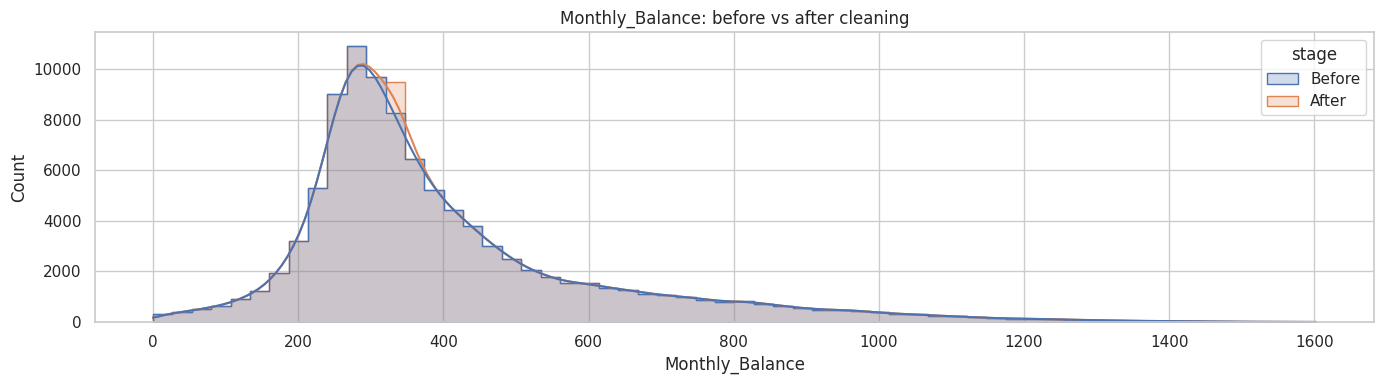

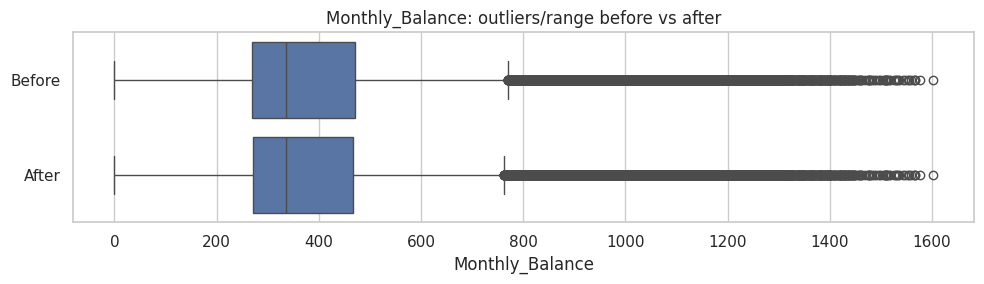

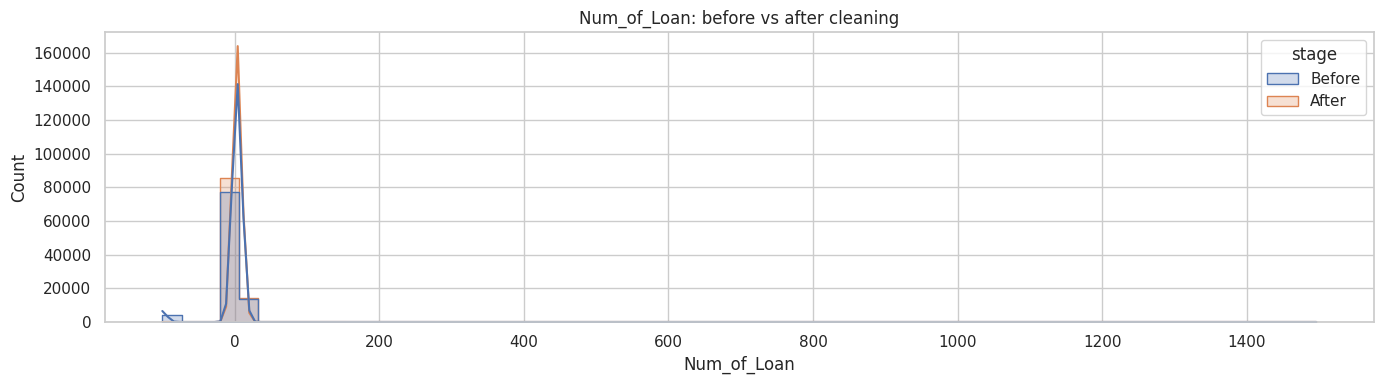

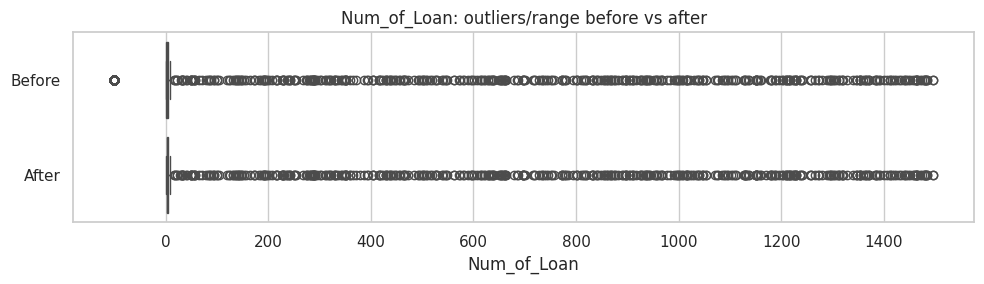

In [14]:
plot_numeric_before_after_seaborn(df, df_clean, "Monthly_Balance")
plot_numeric_before_after_seaborn(df, df_clean, "Num_of_Loan")


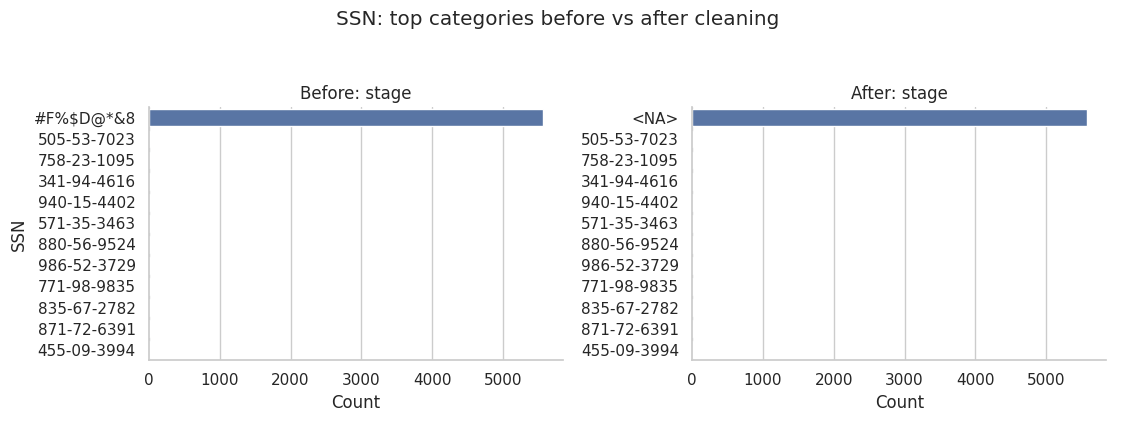

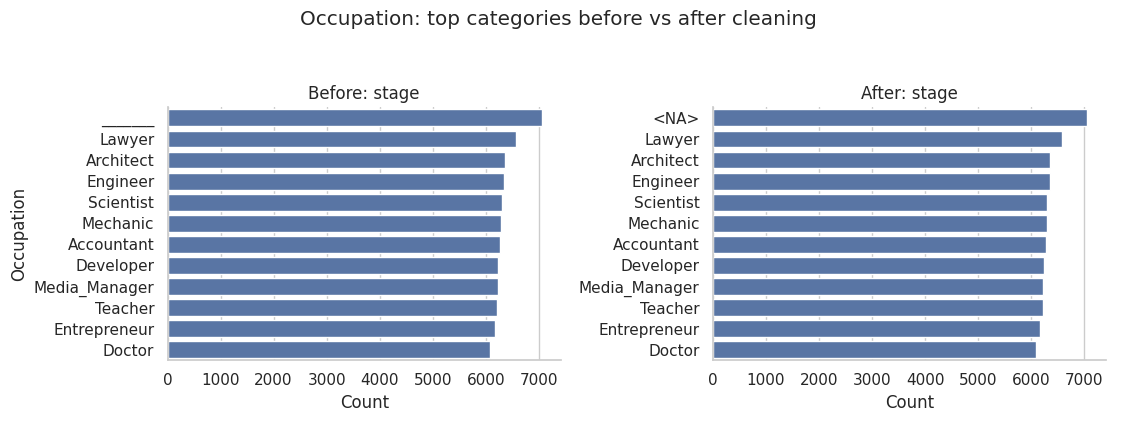

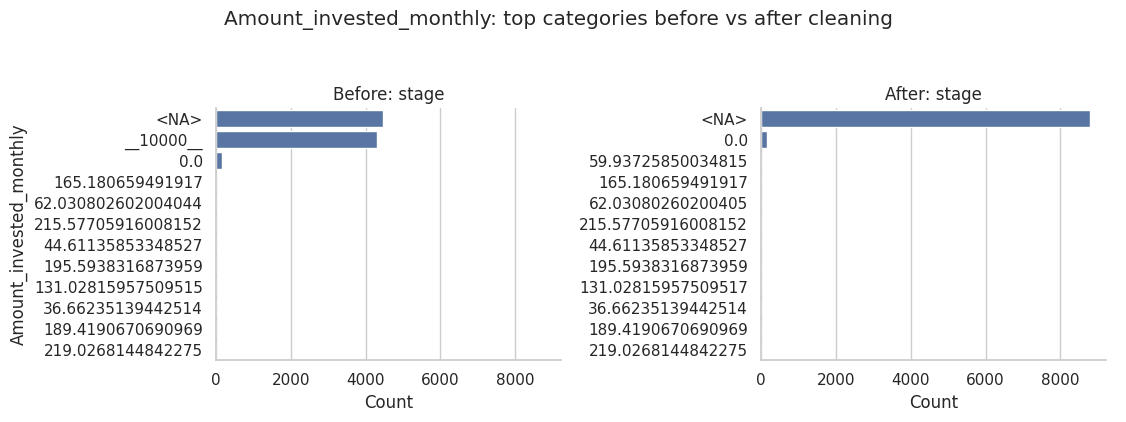

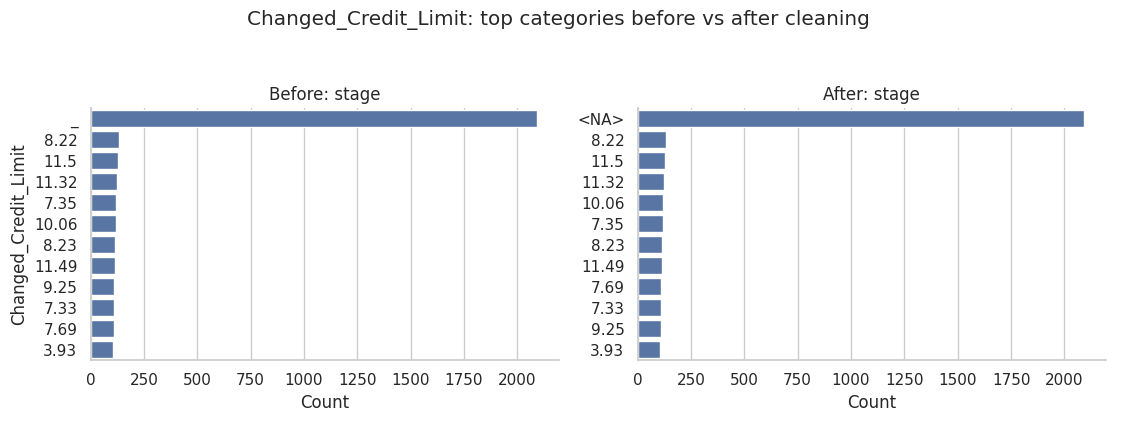

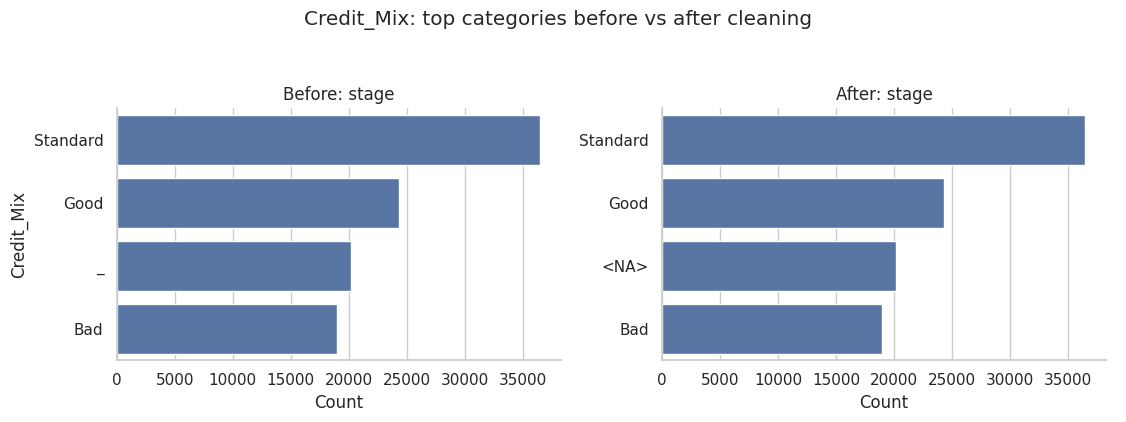

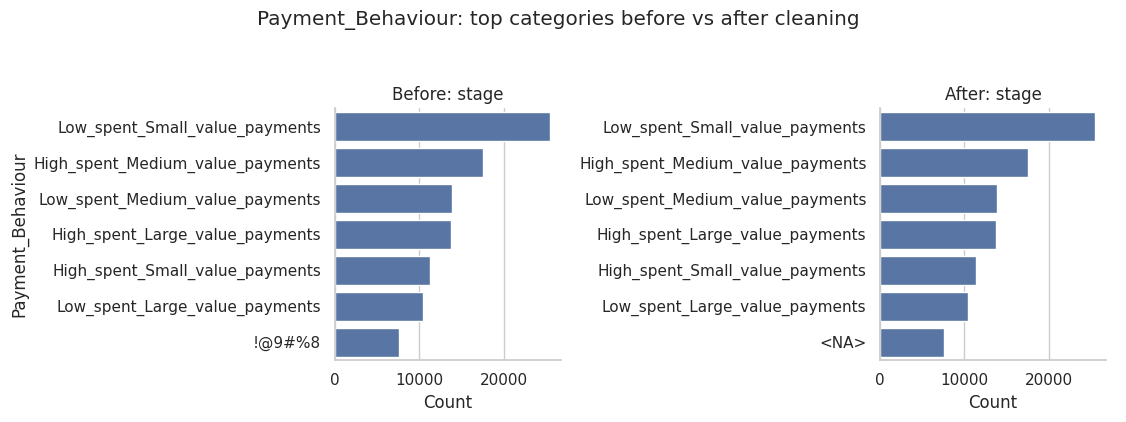

In [15]:
categorical_cols = [
    "SSN",
    "Occupation",
    "Amount_invested_monthly",
    "Changed_Credit_Limit",
    "Credit_Mix",
    "Payment_Behaviour",
]

for col in categorical_cols:
    plot_category_before_after_seaborn(df, df_clean, col, topn=12)
